## Heatmap-Correlation

In [ ]:
!pip install --upgrade --user seaborn
!pip install matplotlib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/wine/ 

##### Data Visualization in order to find  pair of variables are highly correlated (leave out the class label - first column)


In [2]:
# load the dataset
cols = ['Alcohol','Malic acid','Ash','Alcalinity'  ,'Magnesium','Total phenols','Flavanoids'
,'Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315','Proline']

missing_values = ["n/a", "na", "--"]
df_wine = pd.read_csv("wine.data" ,  names= ['cultivar'] + cols , na_values = missing_values)
df_wine.head()

,cultivar,Alcohol,Malic acid,Ash,Alcalinity,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
# checking for null or missing value
missing = df_wine.isnull().sum()
missing[ missing > 0]

Series([], dtype: int64)

In [4]:
#Normalize Data except class label ('cultivar')
y = df_wine['cultivar']
X = df_wine.loc[:,'Alcohol':'Proline'].to_numpy()
scaled_values = StandardScaler().fit_transform(X)

X = np.concatenate((np.expand_dims(y, axis=1),scaled_values),axis=1)
df_wine = pd.DataFrame(X, columns = ['cultivar'] + cols)


In [5]:
#correclation of feature except class label ('cultivar')
corr = df_wine.iloc[:,1:].corr(method ='pearson')

# empty the higher diagonal of matrix
corr = corr.mask(np.triu(np.ones(corr.shape)).astype(np.bool))
corr.head(10)

,Alcohol,Malic acid,Ash,Alcalinity,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
Alcohol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Malic acid,0.094397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ash,0.211545,0.164045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alcalinity,-0.310235,0.288500,0.443367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Magnesium,0.270798,-0.054575,0.286587,-0.083333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Nonflavanoid phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,NaN,NaN,NaN,NaN,NaN,NaN
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,NaN,NaN,NaN,NaN,NaN
Color intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.02525,NaN,NaN,NaN,NaN


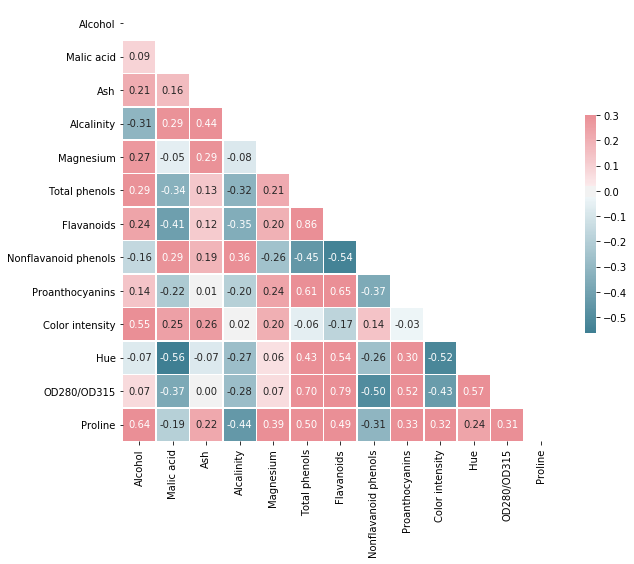

In [6]:
f, ax = plt.subplots(figsize=(10, 8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, annot=True, fmt=".2f", vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()